# 2021/11/23
# 本代码绘制论文中的温度方面的图
# 2m温度 和等压面温度

In [78]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

In [79]:
path  =  "/home/sun/qomo-data/"
level =  [925,850,700,500]
lon_slice  =  slice(30,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  40,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f1  =  xr.open_dataset(path+"composite3.nc").sel(level=level[2],lon=lon_slice,lat=lat_slice)  
f2  =  xr.open_dataset(path+"composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice)  

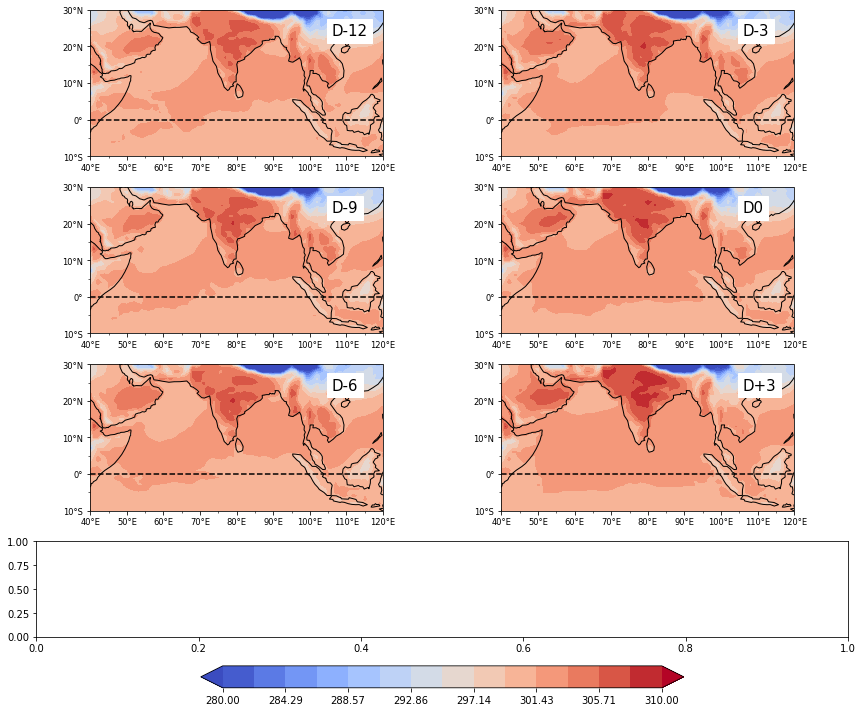

In [25]:
dates  =  [-12,-9,-6,-3,0,3] #总共6张图
date   =  [18,21,24,27,30,33]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,10))

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            #im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(np.nanmin(f2.T2M.data),np.nanmax(f2.T2M.data),20),cmap='Reds',alpha=1,extend='both')
            im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(280,310,15),cmap='coolwarm',alpha=1,extend='both')
            if dates[j] <= 0:
                ax.text(0.825,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            else:
                ax.text(0.825,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            
            #cbar = fig1.colorbar(im, ax=ax, shrink=0.9, pad=0.2, orientation='horizontal')
        
            j += 1
            
ax  =  fig1.add_subplot(spec1[3,:])
cbar = fig1.colorbar(im, ax=ax, shrink=0.9, pad=0.2, orientation='horizontal')



plt.tight_layout()
#plt.savefig("/home/sun/paint/lunwen/temperature/stream_six_times_"+str(level[0])+".pdf", bbox_inches='tight')
#plt.show()

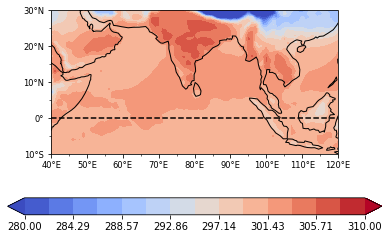

In [36]:
dates  =  [-12,-9,-6,-3,0,3] #总共6张图
date   =  [18,21,24,27,30,33]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,10))

j = 0
    

ax = fig1.add_subplot(3,2,1,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)
            
ax.plot([40,120],[0,0],'k--')
#im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(np.nanmin(f2.T2M.data),np.nanmax(f2.T2M.data),20),cmap='Reds',alpha=1,extend='both')
im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(280,310,15),cmap='coolwarm',alpha=1,extend='both')
#if dates[j] <= 0:
#    ax.text(0.825,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
#else:
#ax.text(0.825,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            
            #cbar = fig1.colorbar(im, ax=ax, shrink=0.9, pad=0.2, orientation='horizontal')
        
j += 1
            
cbar = fig1.colorbar(im, ax=ax, shrink=0.9, pad=0.2, orientation='horizontal')



plt.tight_layout()

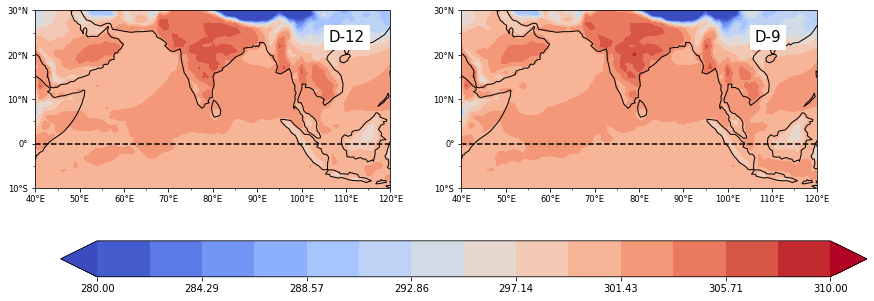

In [61]:
dates  =  [-12,-9,-6,-3,0,3] #总共6张图
date   =  [18,21,24,27,30,33]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(14,10))

j = 0
    
ax = fig1.add_subplot(2,2,1,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)
            
ax.plot([40,120],[0,0],'k--')
#im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(np.nanmin(f2.T2M.data),np.nanmax(f2.T2M.data),20),cmap='Reds',alpha=1,extend='both')
im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(280,310,15),cmap='coolwarm',alpha=1,extend='both')
if dates[j] <= 0:
    ax.text(0.825,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
else:
    ax.text(0.825,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            
#cbar = fig1.colorbar(im, ax=ax, shrink=0.9, pad=0.2, orientation='horizontal')
        
j += 1

ax = fig1.add_subplot(2,2,2,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)
            
ax.plot([40,120],[0,0],'k--')
#im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(np.nanmin(f2.T2M.data),np.nanmax(f2.T2M.data),20),cmap='Reds',alpha=1,extend='both')
im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[j],:],levels=np.linspace(280,310,15),cmap='coolwarm',alpha=1,extend='both')
if dates[j] <= 0:
    ax.text(0.825,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
else:
    ax.text(0.825,0.825,"D+"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            
#cbar = fig1.colorbar(im, ax=ax, shrink=0.9, pad=0.2, orientation='horizontal')
        
j += 1


fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.15, 0.4, 0.8, 0.05])
fig1.colorbar(im, cax=cbar_ax, shrink=0.9, pad=0.2, orientation='horizontal')



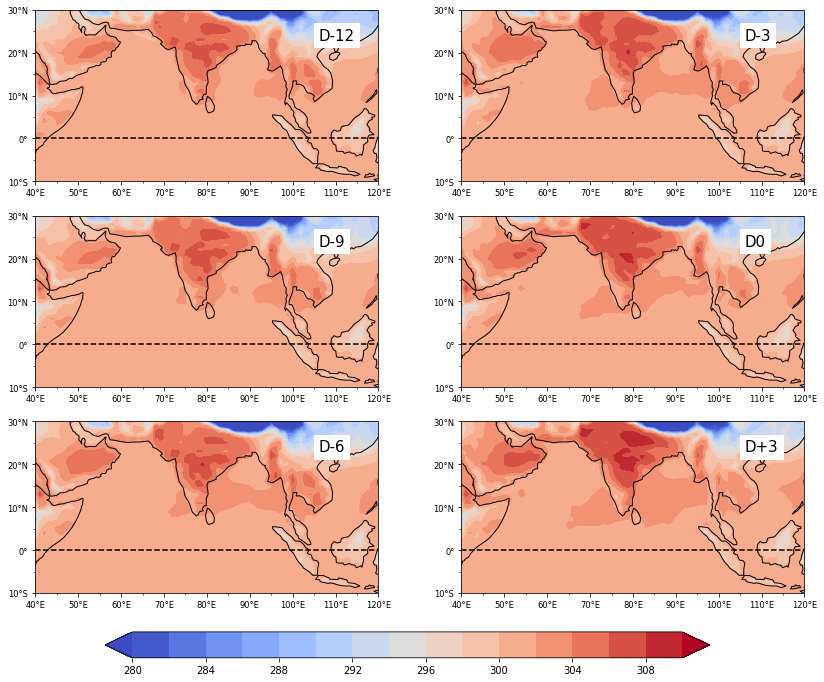

In [77]:
dates  =  [-12,-9,-6,-3,0,3] #总共6张图
date   =  [18,21,24,27,30,33]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(14,12))
    
for j in range(1,6,2):
    ax = fig1.add_subplot(3,2,j,projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[int((j-1)/2)],:],levels=np.linspace(280,310,16),cmap='coolwarm',alpha=1,extend='both')
    if dates[int((j-1)/2)] <= 0:
        ax.text(0.825,0.825,"D"+str(dates[int((j-1)/2)]),transform=ax.transAxes,bbox=props,fontsize=15)
    else:
        ax.text(0.825,0.825,"D+"+str(dates[int((j-1)/2)]),transform=ax.transAxes,bbox=props,fontsize=15)
        
for j in range(2,7,2):
    ax = fig1.add_subplot(3,2,j,projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im  =  ax.contourf(f2.lon,f2.lat,f2.T2M.data[date[int(j/2+2)],:],levels=np.linspace(280,310,16),cmap='coolwarm',alpha=1,extend='both')
    if dates[int(j/2+2)] <= 0:
        ax.text(0.825,0.825,"D"+str(dates[int(j/2+2)]),transform=ax.transAxes,bbox=props,fontsize=15)
    else:
        ax.text(0.825,0.825,"D+"+str(dates[int(j/2+2)]),transform=ax.transAxes,bbox=props,fontsize=15)
            
        




fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

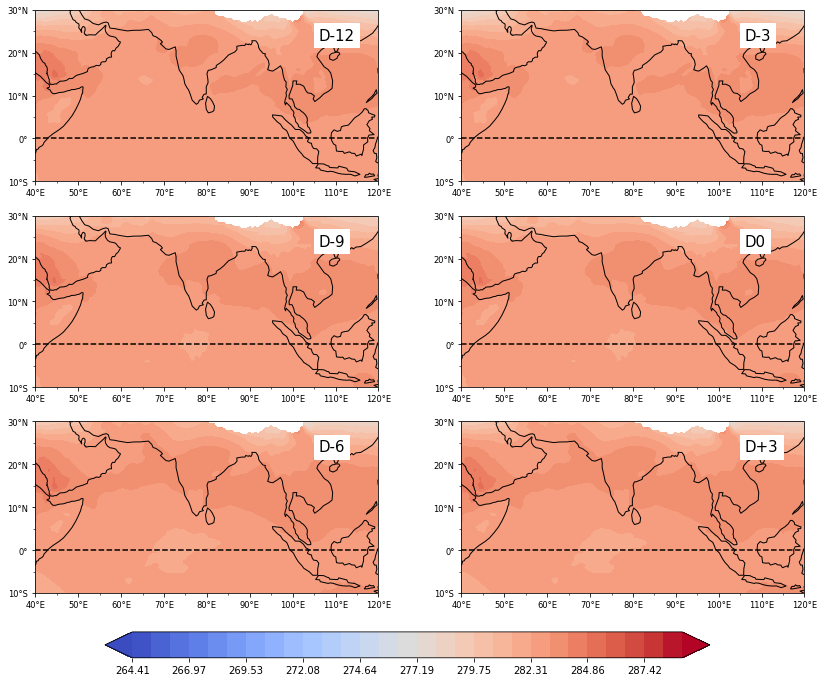

In [84]:
dates  =  [-12,-9,-6,-3,0,3] #总共6张图
date   =  [18,21,24,27,30,33]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(14,12))
    
for j in range(1,6,2):
    ax = fig1.add_subplot(3,2,j,projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im  =  ax.contourf(f1.lon,f1.lat,f1.T.data[date[int((j-1)/2)],:],levels=np.linspace(np.nanmin(f1.T.data),np.nanmax(f1.T.data),30),cmap='coolwarm',alpha=1,extend='both')
    if dates[int((j-1)/2)] <= 0:
        ax.text(0.825,0.825,"D"+str(dates[int((j-1)/2)]),transform=ax.transAxes,bbox=props,fontsize=15)
    else:
        ax.text(0.825,0.825,"D+"+str(dates[int((j-1)/2)]),transform=ax.transAxes,bbox=props,fontsize=15)
        
for j in range(2,7,2):
    ax = fig1.add_subplot(3,2,j,projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im  =  ax.contourf(f1.lon,f1.lat,f1.T.data[date[int((j-1)/2)],:],levels=np.linspace(np.nanmin(f1.T.data),np.nanmax(f1.T.data),30),cmap='coolwarm',alpha=1,extend='both')
    if dates[int(j/2+2)] <= 0:
        ax.text(0.825,0.825,"D"+str(dates[int(j/2+2)]),transform=ax.transAxes,bbox=props,fontsize=15)
    else:
        ax.text(0.825,0.825,"D+"+str(dates[int(j/2+2)]),transform=ax.transAxes,bbox=props,fontsize=15)
            
        




fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')